In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.svm import SVR
import numpy as np


In [ ]:
df = pd.read_csv("WildBlueberryPollinationSimulationData (1).csv")

In [ ]:
X = df.drop(columns=["yield", "Row#"])
y = df["yield"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [ ]:
models = {
   "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Elastic Net": ElasticNet(),
    "Random Forest": RandomForestRegressor(),
    "SVM": SVR(kernel='rbf'),
    "XGBoost": XGBRegressor()
}


In [ ]:
from sklearn.model_selection import cross_val_score

results = []
for name, model in models.items():
    print(f"\nTraining {name} ...")
    if name == "Random Forest":
        # Random forest works on unscaled features (but scaling is harmless)
        model.fit(X_train, y_train)
        preds_train = model.predict(X_train)
        preds_test = model.predict(X_test)
    else:
        model.fit(X_train_s, y_train)
        preds_train = model.predict(X_train_s)
        preds_test = model.predict(X_test_s)
    rmse_train = np.sqrt(mean_squared_error(y_train, preds_train))
    rmse_test = np.sqrt(mean_squared_error(y_test, preds_test))
    # 5-fold cross-validated RMSE (on training set) for more robust estimate
    if name == "Random Forest":
        cv_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
    else:
        cv_scores = cross_val_score(model, X_train_s, y_train, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
    cv_rmse = np.mean(np.sqrt(-cv_scores))
    results.append([name, rmse_train, rmse_test, cv_rmse])

results_df = pd.DataFrame(results, columns=["Model", "RMSE_Train", "RMSE_Test", "CV_RMSE"])


Training Linear Regression ...

Training Ridge Regression ...

Training Lasso Regression ...

Training Elastic Net ...

Training Random Forest ...

Training SVM ...

Training XGBoost ...


In [ ]:
results_df = pd.DataFrame(results, columns=["Model", "RMSE_Train", "RMSE_Test", "CV_RMSE"])
print("\nModel Performance Summary:")
print(results_df)



Model Performance Summary:
               Model   RMSE_Train    RMSE_Test      CV_RMSE
0  Linear Regression   121.885248   129.689053   477.081903
1   Ridge Regression   126.541367   132.297161   130.403891
2   Lasso Regression   126.782932   131.909648   129.657065
3        Elastic Net   216.294864   229.559329   220.186717
4      Random Forest    59.014193   152.695990   164.127681
5                SVM  1304.845412  1378.263217  1314.748526
6            XGBoost    11.540830   144.552490   164.358048


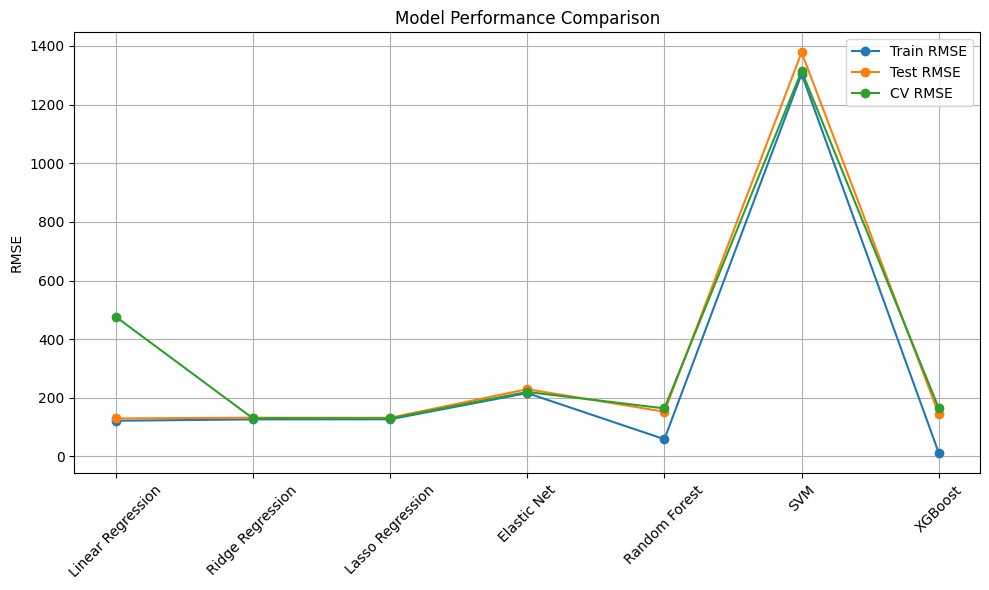

In [ ]:
import matplotlib.pyplot as plt

results_df = results_df.reset_index()
results_df = results_df.set_index("Model")


plt.figure(figsize=(10,6))
plt.plot(results_df.index, results_df["RMSE_Train"], marker='o', label="Train RMSE")
plt.plot(results_df.index, results_df["RMSE_Test"], marker='o', label="Test RMSE")
plt.plot(results_df.index, results_df["CV_RMSE"], marker='o', label="CV RMSE")
plt.xticks(rotation=45)
plt.ylabel("RMSE")
plt.title("Model Performance Comparison")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

📝 Assignment Summary

The Wild Blueberry Yield Prediction project aimed to model the yield using 17 input features. Several regression models were trained, including Linear Regression, Ridge, Lasso, Elastic Net, Random Forest, SVM, and XGBoost.

From the results, Ridge and Lasso Regression showed stable performance with reasonable train, test, and cross-validation RMSE, indicating good generalization. Linear Regression performed moderately well, but its CV RMSE was very high, suggesting sensitivity to different data subsets. Random Forest and XGBoost achieved extremely low training RMSE, which indicates overfitting, although XGBoost performed reasonably on the test set and has strong predictive potential if tuned. Elastic Net and SVM performed poorly, likely due to over-penalization and unsuitable hyperparameters, respectively.

Overall, Ridge and Lasso are recommended for stable deployment, while XGBoost can be considered for high-accuracy predictions after hyperparameter tuning. The model evaluation was done using RMSE, which provided a clear measure of prediction error for continuous yield values